# Introduction to GeoPandas

![geopandas](images/geopandas.jpg)

## What is GeoPandas?

>GeoPandas is an **open-source library** the helps in working with **geospatial data in python**. GeoPandas **extends the datatypes used by pandas** to allow spatial operations on geometric types.  

### How to import and use GeoPandas?

We will use the familiar import statement 

In [31]:
import geopandas as gpd

and that's it, you have successfully imported geopandas to your programming environment

## Reading Geospatial Data using GeoPandas

Geospatial data can be represented in many different file formats. Here we look into few commonly used spatial file formats and how we can leverage geopandas to read them. 

### Various file formats to store Geospatial Data

#### ESRI Shapefile

![shapefile](images/shapefile.png)

One of the most common vector file format is the shapefile.  It is developed and regulated by ESRI (Environmental Systems Research Institute) as a mostly open specification for data interoperability among Esri and other GIS software products.

##### Structure of a shapefile

![shp](images/shp.png)

![sh2](images/shp2.png)

Its important that when you are reading a shapefile, along with the .shp file all other mandatory files are present. And when you want to transfer the shapefile to another machine, then you should make sure that all these files are together (a good strategy will be to zip them together as a single archive).

##### Reading a shapefile using GeoPandas

We have already seen how we can use geopandas to read a shapefile, some additional examples are provided here. 

In [32]:
#reading a shapefile using the read_file method
ohioHospitals = gpd.read_file(r'data/Ohio_hospitals/Ohio_hospitals.shp')

Now let's explore the contents of the shapefile

In [33]:
ohioHospitals

,OBJECTID,ID,NAME,ADDRESS,CITY,STATE,TELEPHONE,TYPE,STATUS,POPULATION,...,WEBSITE,STATE_ID,ALT_NAME,ST_FIPS,OWNER,TTL_STAFF,BEDS,TRAUMA,HELIPAD,geometry
0,235,14244266,ROBINSON MEMORIAL HOSPITAL,6847 N CHESTNUT,RAVENNA,OH,(330) 297-2300,GENERAL ACUTE CARE,OPEN,302,...,http://www.uhhospitals.org/portage,1255,UNIVERSITY HOSPITALS PORTAGE MEDICAL CENTER,39,NON-PROFIT,-999,302,LEVEL III,Y,POINT (-81.24902 41.17606)
1,246,17545409,MIAMI VALLEY HOSPITAL,ONE WYOMING STREET,DAYTON,OH,(937) 208-8000,GENERAL ACUTE CARE,OPEN,883,...,http://www.miamivalleyhospital.org,1247,NOT AVAILABLE,39,NON-PROFIT,-999,883,LEVEL I,Y,POINT (-84.18591 39.74489)
2,259,14044481,ST JOSEPH HEALTH CENTER,667 EASTLAND AVE SE,WARREN,OH,(330) 841-4000,GENERAL ACUTE CARE,OPEN,219,...,http://www.hmpartners.org,1000,NOT AVAILABLE,39,NON-PROFIT,-999,219,LEVEL III,Y,POINT (-80.77716 41.23091)
3,260,2944482,TRUMBULL MEMORIAL HOSPITAL,1350 EAST MARKET STREET,WARREN,OH,(330) 841-9011,GENERAL ACUTE CARE,OPEN,346,...,http://www.valleycarehealth.net,1283,NOT AVAILABLE,39,PROPRIETARY,-999,346,LEVEL III,Y,POINT (-80.79878 41.23586)
4,268,9344221,EDWIN SHAW REHABILITATION INSTITUTE,330 BROADWAY EAST,CUYAHOGA FALLS,OH,(330) 436-0910,REHABILITATION,CLOSED,139,...,http://www.edwinshaw.com,1320,NOT AVAILABLE,39,NON-PROFIT,-999,139,NOT AVAILABLE,N,POINT (-81.47738 41.13215)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2952,75859,128844512,VIBRA HOSPITAL OF MAHONING VALLEY,8049 SOUTH AVENUE,BOARDMAN,OH,(330) 726-5021,LONG TERM CARE,OPEN,45,...,http://www.mahoningvalleyhospital.com/,1428,MAHONING VALLEY HOSPITAL BOARDMAN CAMPUS,39,PROPRIETARY,-999,45,NOT AVAILABLE,N,POINT (-80.63297 41.00517)
2953,75868,24,88TH MEDICAL GROUP - WRIGHT-PATTERSON AIR FORC...,4881 SUGAR MAPLE DR,WRIGHT PATTERSON AFB,OH,NOT AVAILABLE,MILITARY,OPEN,57,...,http://www.wpafb.af.mil/units/wpmc/index.asp,NOT AVAILABLE,NOT AVAILABLE,39,GOVERNMENT - FEDERAL,-999,57,NOT AVAILABLE,N,POINT (-84.03741 39.80535)
2954,76333,183043232,MOUNT CARMEL BEHAVIORAL HEALTHCARE LLC,4646 HILTON CORPORATE DRIVE,COLUMBUS,OH,(614) 487-2080,PSYCHIATRIC,OPEN,80,...,https://www.mountcarmelbehavioralhealth.com/?u...,1916AHR,NOT AVAILABLE,39,NOT AVAILABLE,-999,80,NOT AVAILABLE,N,POINT (-82.87038 39.93575)
2955,76335,188444236,ASSURANCE HEALTH HUDSON,6260 HUDSON CROSSING PKWY,HUDSON,OH,(330) 208-9317,PSYCHIATRIC,OPEN,23,...,http://assurancehealthsystem.com/locations/hud...,1910AHR,NOT AVAILABLE,39,NOT AVAILABLE,-999,23,NOT AVAILABLE,N,POINT (-81.48797 41.23634)


As you can see the structure is more like a pandas DataFrame. But is it really a DataFrame. Let us check the type

In [34]:
type(ohioHospitals)

geopandas.geodataframe.GeoDataFrame

It is a GeoDataFrame.Let's see the data type for each columns 

In [35]:
ohioHospitals.dtypes

OBJECTID         int64
ID               int64
NAME            object
ADDRESS         object
CITY            object
STATE           object
TELEPHONE       object
TYPE            object
STATUS          object
POPULATION       int64
COUNTRY         object
LATITUDE       float64
LONGITUDE      float64
NAICS_CODE       int64
NAICS_DESC      object
SOURCE          object
SOURCEDATE      object
VAL_METHOD      object
VAL_DATE        object
WEBSITE         object
STATE_ID        object
ALT_NAME        object
ST_FIPS          int64
OWNER           object
TTL_STAFF        int64
BEDS             int64
TRAUMA          object
HELIPAD         object
geometry      geometry
dtype: object

While most other data types are familiar to you, geometry is a new data type that you notice here (which is the key column in a GeoDataFrame). 

You can apply any type of data manipulations as you have done with DataFrames for columns other than geometry (geometry column is what makes GeoDataFrame different from DataFrame)

There are some additional attributes to GeoDataFrame. 

In [36]:
ohioHospitals.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

The crs attribute gives the projection information for this geospatial dataset. We will learn more about projections in the upcoming chapters. 

##### Writing a shapefile using GeoPandas

We can write a GeoDataFrame to a shapefile using the to_file() function. Let's filter out hospitals having helipad facility from our hospital dataset. 

In [37]:
ohioHospitalsWithHeliPad = ohioHospitals[ohioHospitals.HELIPAD=='Y']
ohioHospitalsWithHeliPad

,OBJECTID,ID,NAME,ADDRESS,CITY,STATE,TELEPHONE,TYPE,STATUS,POPULATION,...,WEBSITE,STATE_ID,ALT_NAME,ST_FIPS,OWNER,TTL_STAFF,BEDS,TRAUMA,HELIPAD,geometry
0,235,14244266,ROBINSON MEMORIAL HOSPITAL,6847 N CHESTNUT,RAVENNA,OH,(330) 297-2300,GENERAL ACUTE CARE,OPEN,302,...,http://www.uhhospitals.org/portage,1255,UNIVERSITY HOSPITALS PORTAGE MEDICAL CENTER,39,NON-PROFIT,-999,302,LEVEL III,Y,POINT (-81.24902 41.17606)
1,246,17545409,MIAMI VALLEY HOSPITAL,ONE WYOMING STREET,DAYTON,OH,(937) 208-8000,GENERAL ACUTE CARE,OPEN,883,...,http://www.miamivalleyhospital.org,1247,NOT AVAILABLE,39,NON-PROFIT,-999,883,LEVEL I,Y,POINT (-84.18591 39.74489)
2,259,14044481,ST JOSEPH HEALTH CENTER,667 EASTLAND AVE SE,WARREN,OH,(330) 841-4000,GENERAL ACUTE CARE,OPEN,219,...,http://www.hmpartners.org,1000,NOT AVAILABLE,39,NON-PROFIT,-999,219,LEVEL III,Y,POINT (-80.77716 41.23091)
3,260,2944482,TRUMBULL MEMORIAL HOSPITAL,1350 EAST MARKET STREET,WARREN,OH,(330) 841-9011,GENERAL ACUTE CARE,OPEN,346,...,http://www.valleycarehealth.net,1283,NOT AVAILABLE,39,PROPRIETARY,-999,346,LEVEL III,Y,POINT (-80.79878 41.23586)
6,682,125744501,SELECT SPECIALTY HOSPITAL - YOUNGSTOWN,1044 BELMONT AVE,YOUNGSTOWN,OH,(330) 480-6664,LONG TERM CARE,OPEN,31,...,http://youngstown.selectspecialtyhospitals.com/,1432,NOT AVAILABLE,39,PROPRIETARY,-999,31,NOT AVAILABLE,Y,POINT (-80.65841 41.11393)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2909,74940,9045238,MERCY HOSPITAL WEST,3131 QUEEN CITY AVENUE,CINCINNATI,OH,(513) 389-5915,GENERAL ACUTE CARE,CLOSED,156,...,http://www.e-mercy.com,360113,NOT AVAILABLE,39,NON-PROFIT,-999,156,NOT AVAILABLE,Y,POINT (-84.60736 39.13496)
2911,75027,182444321,"CLEVELAND CLINIC REHABILITATION HOSPITAL, EDWI...",4389 MEDINA ROAD,COPLEY,OH,(234) 815-5100,REHABILITATION,OPEN,160,...,my.clevelandclinic.org,NOT AVAILABLE,NOT AVAILABLE,39,NON-PROFIT,-999,160,NOT AVAILABLE,Y,POINT (-81.66234 41.13671)
2912,75029,191245069,THE CHRIST HOSPITAL MEDICAL CENTER - LIBERTY T...,6939 COX RD,LIBERTY TOWNSHIP,OH,(513) 564-1600,GENERAL ACUTE CARE,OPEN,-999,...,thechristhospital.com,NOT AVAILABLE,NOT AVAILABLE,39,NOT AVAILABLE,-999,-999,NOT AVAILABLE,Y,POINT (-84.36297 39.37482)
2947,75095,196784157,CHILDREN'S HOSP MED CTR OF AKRON,ONE PERKINS SQUARE,AKRON,OH,(330) 543-8167,CHILDREN,OPEN,402,...,https://www.akronchildrens.org/,20038900,NOT AVAILABLE,39,NON-PROFIT,-999,402,NOT AVAILABLE,Y,POINT (-81.52510 41.07962)


In [38]:
ohioHospitalsWithHeliPad.to_file(r'data/Ohio_hospitals/Ohio_hospitals_with_helipads.shp')

##### Some limitations associated with shapefile

1. Maximum length of field names is 10 characters.

2. Maximum number of fields is 255.

3. Supported field types are: floating point (13 character storage), integer (4 or 9 character storage), date (no time storage; 8 character storage), and text (maximum 254 character storage).

4. Floating point numbers may contain rounding errors since they are stored as text. 

5. Poor support for Unicode field names or field storage

#### Comma Seperated Value File (CSV)

We have already seen how we can use Pandas/or even using open() function to red and manipulate a CSV file. Now let's see how we can store spatial information in a CSV file and then retrieve it using geopandas. 

#### A fun exercise to create your own CSV file

Create a file mylocations.csv in this folder. You can create a blank text file by right clicking on anywhere within the left pane and then selecting New File. Change its name to locations.csv.  Now right click and select Open With and then select Editor. Now type in **Name,latitude,longitude** as the first line. Now go to google maps (https://www.google.com/maps) and then search for a place you like. Right click on the pin and then click on the GPS coordinates.

![gimage](images/gimage.png)

Now in the next line of your locations.csv file add the name of the place, and copy paste the latitude and longitude  Algebra Tea House,41.50551654803099, -81.59965605815175 .  Now add two more places

| Name | latitude | longitude |
| --- | --- | --- |
| Algebra Tea House | 41.50551654803099 | -81.59965605815175 |
| Robbins Building | 41.50476637608831 | -81.60311165074789 |
| One to one fitness | 41.50324028571213 | -81.60551056216389 |

So now we have a csv file with geospatial information in the form of coordinates. If we want to convert this into a GeoDataFrame, we can first read the dataset as a DataFrame. We have already seen this.

In [39]:
import pandas as pd
tableData = pd.read_csv(r'locations.csv')
tableData

,Name,latitude,longitude
0,Algebra Tea House,41.505517,-81.599656
1,Robbins Building,41.504766,-81.603112
2,One to one fitness,41.503240,-81.605511


Now in-order to construct a GeoDataFrame from this DataFrame we will use the GeoDataFrame constructor

In [40]:
locationsGeo = gpd.GeoDataFrame(tableData,geometry=gpd.points_from_xy(tableData.longitude,tableData.latitude),crs='EPSG:4326')
locationsGeo

,Name,latitude,longitude,geometry
0,Algebra Tea House,41.505517,-81.599656,POINT (-81.59966 41.50552)
1,Robbins Building,41.504766,-81.603112,POINT (-81.60311 41.50477)
2,One to one fitness,41.503240,-81.605511,POINT (-81.60551 41.50324)


Woww!, that's a bit complicated. Don't worry, we will go through each parameter one-by-one. The GeoDataFrame constructor takes in data (in this case the pandas DataFrame), geometry (in this case we are constructing a column of geometries using the points_from_xy function in GeoPandas. geometry could also be a column name if the data is another GeoDataFrame), and crs. The function points_from_xy accepts the longitude and latitude (careful about the order) and creates a column of geometries. The crs parameter refers to the coordinates reference system (CRS) which provide details about the projection of the coordinate system used to represent the spatial data. Coordinates can be projected as well as unprojected (also called geographical). For example, the GPS device that we are familiar with produces geographical coordinates (unrpojected). Projections helps to represent the earth on a flat surface. We will learn more about projections in the upcoming chapter. If you want to see the details of the coordinate reference system for the GeoDataFrame, then you can use the crs attribute. 

In [41]:
locationsGeo.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<AxesSubplot:>

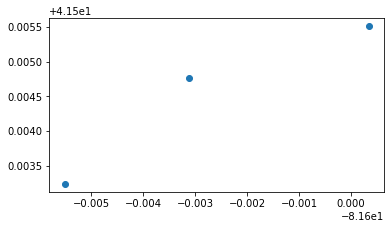

In [42]:
locationsGeo.plot()

Now let's read another csv file 

In [43]:
equakeData = pd.read_csv(r'data/earthquake_above4.5_us_only.csv')
equakeData

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2022-04-15T04:30:55.980Z,31.930500,-116.892500,14.510000,4.54,mw,27.0,234.0,0.20380,0.230,...,2022-05-13T14:55:07.871Z,"20km W of El Sauzal, B.C., MX",earthquake,0.800000,1.060000,NaN,6.0,reviewed,ci,ci
1,2022-03-25T03:01:58.874Z,31.669093,-104.420423,6.799976,4.60,ml,65.0,61.0,0.06850,0.200,...,2022-04-27T01:17:26.280Z,"56 km S of Whites City, New Mexico",earthquake,0.892217,1.011929,0.200,38.0,reviewed,tx,tx
2,2022-02-15T21:16:24.065Z,38.181400,-117.783300,4.100000,4.70,ml,23.0,33.3,0.12000,0.132,...,2022-04-30T14:18:16.040Z,"36 km SE of Mina, Nevada",earthquake,NaN,3.500000,0.140,7.0,reviewed,nn,nn
3,2022-01-31T17:10:21.129Z,36.851000,-97.793500,7.850000,4.50,mww,96.0,91.0,0.00000,0.230,...,2022-04-15T17:57:08.040Z,"7 km NW of Medford, Oklahoma",earthquake,NaN,0.500000,NaN,35.0,reviewed,ok,us
4,2022-01-21T21:26:35.964Z,26.767500,-110.867100,10.000000,5.30,mww,NaN,110.0,3.77300,0.890,...,2022-04-01T17:40:27.040Z,"76 km SSW of Bahía de Lobos, Mexico",earthquake,6.900000,1.900000,0.039,63.0,reviewed,us,us
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,2012-08-26T19:20:04.810Z,33.015833,-115.536333,4.790000,4.59,mw,23.0,87.0,0.03107,0.120,...,2020-05-02T03:01:48.823Z,"4km N of Brawley, CA",earthquake,0.390000,0.480000,NaN,6.0,reviewed,ci,ci
292,2012-08-02T22:13:18.610Z,24.999000,-109.391000,10.000000,4.80,mb,270.0,162.3,NaN,1.290,...,2015-03-24T02:27:06.478Z,"74 km SSW of Topolobampo, Mexico",earthquake,NaN,NaN,NaN,206.0,reviewed,us,us
293,2012-07-01T06:36:06.350Z,32.213167,-115.288667,9.641000,4.68,mw,14.0,189.0,0.20620,0.220,...,2020-05-02T02:59:43.160Z,"11km W of Alberto Oviedo Mota, B.C., MX",earthquake,1.240000,31.610000,NaN,6.0,reviewed,ci,ci
294,2012-07-01T03:25:20.450Z,32.207167,-115.343167,2.821000,4.64,mw,10.0,187.0,0.21420,0.240,...,2021-03-10T00:10:56.580Z,"16km W of Alberto Oviedo Mota, B.C., MX",earthquake,1.260000,8.280000,NaN,0.0,reviewed,ci,ci


So we do have the columns longitude and latitude that we could use to create our GeoDataFrame

In [44]:
equakeGeo = gpd.GeoDataFrame(equakeData,geometry = gpd.points_from_xy(equakeData.longitude,equakeData.latitude),crs='EPSG:4326')
equakeGeo

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource,geometry
0,2022-04-15T04:30:55.980Z,31.930500,-116.892500,14.510000,4.54,mw,27.0,234.0,0.20380,0.230,...,"20km W of El Sauzal, B.C., MX",earthquake,0.800000,1.060000,NaN,6.0,reviewed,ci,ci,POINT (-116.89250 31.93050)
1,2022-03-25T03:01:58.874Z,31.669093,-104.420423,6.799976,4.60,ml,65.0,61.0,0.06850,0.200,...,"56 km S of Whites City, New Mexico",earthquake,0.892217,1.011929,0.200,38.0,reviewed,tx,tx,POINT (-104.42042 31.66909)
2,2022-02-15T21:16:24.065Z,38.181400,-117.783300,4.100000,4.70,ml,23.0,33.3,0.12000,0.132,...,"36 km SE of Mina, Nevada",earthquake,NaN,3.500000,0.140,7.0,reviewed,nn,nn,POINT (-117.78330 38.18140)
3,2022-01-31T17:10:21.129Z,36.851000,-97.793500,7.850000,4.50,mww,96.0,91.0,0.00000,0.230,...,"7 km NW of Medford, Oklahoma",earthquake,NaN,0.500000,NaN,35.0,reviewed,ok,us,POINT (-97.79350 36.85100)
4,2022-01-21T21:26:35.964Z,26.767500,-110.867100,10.000000,5.30,mww,NaN,110.0,3.77300,0.890,...,"76 km SSW of Bahía de Lobos, Mexico",earthquake,6.900000,1.900000,0.039,63.0,reviewed,us,us,POINT (-110.86710 26.76750)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,2012-08-26T19:20:04.810Z,33.015833,-115.536333,4.790000,4.59,mw,23.0,87.0,0.03107,0.120,...,"4km N of Brawley, CA",earthquake,0.390000,0.480000,NaN,6.0,reviewed,ci,ci,POINT (-115.53633 33.01583)
292,2012-08-02T22:13:18.610Z,24.999000,-109.391000,10.000000,4.80,mb,270.0,162.3,NaN,1.290,...,"74 km SSW of Topolobampo, Mexico",earthquake,NaN,NaN,NaN,206.0,reviewed,us,us,POINT (-109.39100 24.99900)
293,2012-07-01T06:36:06.350Z,32.213167,-115.288667,9.641000,4.68,mw,14.0,189.0,0.20620,0.220,...,"11km W of Alberto Oviedo Mota, B.C., MX",earthquake,1.240000,31.610000,NaN,6.0,reviewed,ci,ci,POINT (-115.28867 32.21317)
294,2012-07-01T03:25:20.450Z,32.207167,-115.343167,2.821000,4.64,mw,10.0,187.0,0.21420,0.240,...,"16km W of Alberto Oviedo Mota, B.C., MX",earthquake,1.260000,8.280000,NaN,0.0,reviewed,ci,ci,POINT (-115.34317 32.20717)


You can see the geometry column in the GeoDataFrame

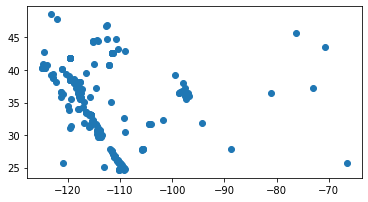

In [45]:
equakeGeo.plot();

#### Keyhole Markup Language (KML)

![kml](images/kml.png)

KML is a file format used to display geographic data in an Earth browser such as Google Earth. But what is Google Earth.

##### What is Google Earth?

Google Earth is a cool software that renders a 3D representation of Earth based primarily on satellite imagery. The program maps the Earth by superimposing satellite images, aerial photography, and GIS data onto a 3D globe, allowing users to see cities and landscapes from various angles.

![google_earth](images/google-earth-18.jpg)

###### Some fun with Google Earth

Let us install google earth. 

https://www.google.com/earth/versions/#download-pro

Now open google earth

![gearth1](images/gearth1.png)

Zoom into your favorite location and then add a pin (point). 

![gearth2](images/gearth2.png)

Add name and description

![gearth3](images/gearth3.png)

Now add a path (polyline)

![gearth4](images/gearth4.png)

And finally a polygon 

![gearth5](images/gearth5.png)


Now right click on the My Places icon and then select Save Place As

![gearth6](images/gearth6.png)

Save your work as a KML file in any folder. 

![gearth7](images/gearth7.png)

We have completed the data collection stage, now let's bring the data to Python. First upload the kml file to this folder using the upload feature in Jupyter lab

![gearth8](images/gearth8.png)

<AxesSubplot:>

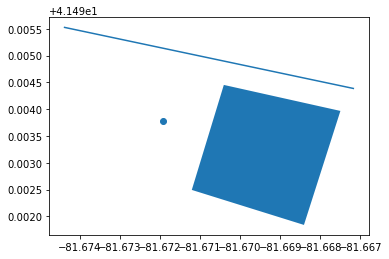

In [46]:
import geopandas as gpd
from fiona.drvsupport import supported_drivers
supported_drivers['LIBKML'] = 'rw'
kmlFile = gpd.read_file('My Places_new.kml', driver='LIBKML')
kmlFile.plot()

#### GPS Exchange Format File (GPX)

![gps_devices](images/gps_devices.jpg)

GPX, or GPS Exchange Format, is an XML schema designed as a common GPS data format for software applications. It can be used to describe waypoints, tracks, and routes. Let's checkout a GPX file using geopandas

In [47]:
import geopandas as gpd
gpsData = gpd.read_file('data/VD12112017_Rob1of4_corrected_gps.gpx', layer='track_points')
gpsData

,track_fid,track_seg_id,track_seg_point_id,ele,time,magvar,geoidheight,name,cmt,desc,...,sym,type,fix,sat,hdop,vdop,pdop,ageofdgpsdata,dgpsid,geometry
0,0,0,0,None,2018-07-24 21:31:16+00:00,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,POINT (-72.34909 18.53818)
1,0,0,1,None,2018-07-24 21:31:17+00:00,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,POINT (-72.34909 18.53818)
2,0,0,2,None,2018-07-24 21:31:18+00:00,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,POINT (-72.34909 18.53818)
3,0,0,3,None,2018-07-24 21:31:19+00:00,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,POINT (-72.34909 18.53818)
4,0,0,4,None,2018-07-24 21:31:20+00:00,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,POINT (-72.34909 18.53818)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2482,0,0,2482,None,2018-07-24 22:12:38+00:00,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,POINT (-72.35238 18.54243)
2483,0,0,2483,None,2018-07-24 22:12:39+00:00,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,POINT (-72.35238 18.54243)
2484,0,0,2484,None,2018-07-24 22:12:40+00:00,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,POINT (-72.35238 18.54243)
2485,0,0,2485,None,2018-07-24 22:12:41+00:00,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,POINT (-72.35238 18.54243)


<AxesSubplot:>

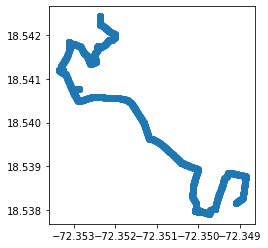

In [48]:
gpsData.plot()

In the next lecture we will look into projections and proceed to geospatial operations.